In [2]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin

In [3]:
# Load datasets
women = pd.read_csv('women_results.csv')
men = pd.read_csv('men_results.csv')

In [4]:
# Explore datasets

In [5]:
women.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1969-11-01,Italy,France,1,0,Euro
1,1,1969-11-01,Denmark,England,4,3,Euro
2,2,1969-11-02,England,France,2,0,Euro
3,3,1969-11-02,Italy,Denmark,3,1,Euro
4,4,1975-08-25,Thailand,Australia,3,2,AFC Championship


In [6]:
women.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4884 non-null   int64 
 1   date        4884 non-null   object
 2   home_team   4884 non-null   object
 3   away_team   4884 non-null   object
 4   home_score  4884 non-null   int64 
 5   away_score  4884 non-null   int64 
 6   tournament  4884 non-null   object
dtypes: int64(3), object(4)
memory usage: 267.2+ KB


In [7]:
men.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1872-11-30,Scotland,England,0,0,Friendly
1,1,1873-03-08,England,Scotland,4,2,Friendly
2,2,1874-03-07,Scotland,England,2,1,Friendly
3,3,1875-03-06,England,Scotland,2,2,Friendly
4,4,1876-03-04,Scotland,England,3,0,Friendly


In [8]:
women['tournament'].value_counts()

UEFA Euro qualification                 1445
Algarve Cup                              551
FIFA World Cup                           284
AFC Championship                         268
Cyprus Cup                               258
African Championship qualification       226
UEFA Euro                                184
African Championship                     173
FIFA World Cup qualification             172
CONCACAF Gold Cup qualification          143
AFC Asian Cup qualification              141
Copa América                             131
Olympic Games                            130
CONCACAF Gold Cup                        126
Friendly                                 111
AFC Asian Cup                            111
Four Nations Tournament                  106
OFC Championship                          78
African Cup of Nations qualification      58
CONCACAF Championship                     42
SheBelieves Cup                           39
Euro                                      20
African Cu

In [9]:
men.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44353 entries, 0 to 44352
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  44353 non-null  int64 
 1   date        44353 non-null  object
 2   home_team   44353 non-null  object
 3   away_team   44353 non-null  object
 4   home_score  44353 non-null  int64 
 5   away_score  44353 non-null  int64 
 6   tournament  44353 non-null  object
dtypes: int64(3), object(4)
memory usage: 2.4+ MB


In [10]:
# Convert dates to datetime objects
women['date'] = pd.to_datetime(women['date'])
men['date'] = pd.to_datetime(men['date'])

In [11]:
# Create a column to store number of goals scored in each game 
women['goals_scored'] = women['home_score'] + women['away_score']
men['goals_scored'] = men['home_score'] + men['away_score']

In [12]:
# Create a column to store gender 
women['gender'] = 'women'
men['gender'] = 'men'

In [13]:
# Filtering datasets to keep only World Cup games after 1st January 2002
women_wc = women[women['tournament'] == 'FIFA World Cup']
women_wc_recent = women_wc[women_wc['date'] > '2002-01-01']

men_wc = men[men['tournament'] == 'FIFA World Cup']
men_wc_recent = men_wc[men_wc['date'] > '2002-01-01']

In [14]:
# Check if there are enough observations to perform a two-sample t-test (at least 30 observations) 
print(f"number of rows in women's filtered dataset: {len(women_wc_recent)}")
print(f"number of rows in men's filtered dataset: {len(men_wc_recent)}")

number of rows in women's filtered dataset: 200
number of rows in men's filtered dataset: 384


In [15]:
# Check if the observations are normally distributed for a parametric test

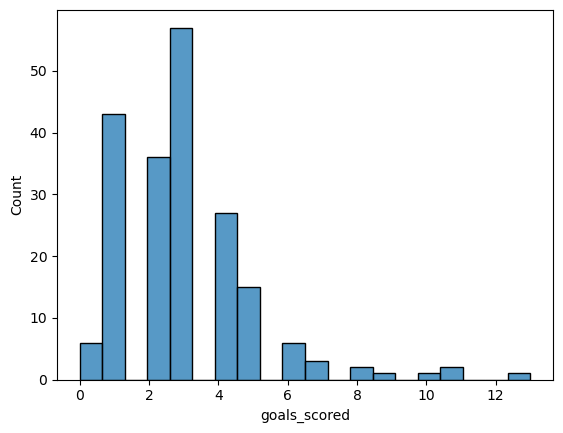

In [16]:
sns.histplot(data=women_wc_recent, x='goals_scored')
plt.show()

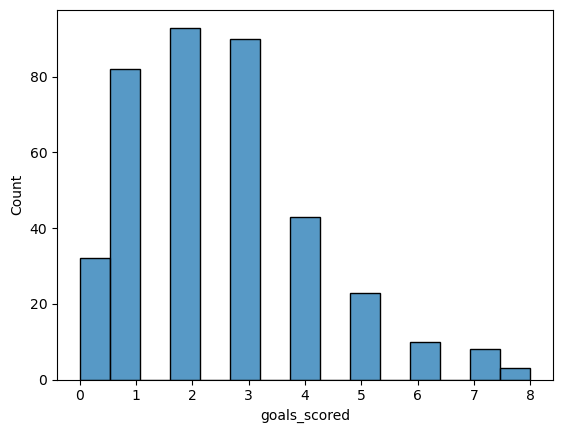

In [17]:
sns.histplot(data=men_wc_recent, x='goals_scored')
plt.show()

In [18]:
# As the samples are not normally distributed, run a non-parametric test

In [19]:
# Merge both datasets and prepare consolidated dataset to run a Wilcoxon-Mann-Whitney test
women_men = pd.concat([women_wc_recent, men_wc_recent], axis=0, ignore_index=True)
women_men_subset = women_men[['goals_scored', 'gender']]
women_men_subset_wide = women_men_subset.pivot(columns='gender', values='goals_scored')

In [20]:
# Run Wilcoxon-Mann-Whitney test
results_pg = pingouin.mwu(x=women_men_subset_wide['women'], y=women_men_subset_wide['men'], alternative='greater')

In [29]:
# Calculate p-value and determine hypothesis test result based on a pre-determined significance threshold
significance_threshold = 0.1
p_val = results_pg["p-val"].values[0]

if p_val <= significance_threshold:
    print(f'p-value ({round(p_val, 2)}) is lower than the significance threshold ({significance_threshold})')
    print('Reject the null hypothesis')
else:
    print(f'p-value ({round(p_val, 2)}) is higher than the significance threshold ({significance_threshold})')
    print('Fail to reject the null hypothesis')

p-value (0.01) is lower than the significance threshold (0.1)
Reject the null hypothesis
